| **Chapter** | 8: Spatial dynamics of epidemics |
| ------------- | --------------------------------- |
| **Computational Note** | 8.x: Simple spatial lattice models |
| **Package prerequisites** | None |

# Simple spatial lattice models

In [31]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import PowerNorm
from matplotlib import rcParams

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In this Computational Note, we initialise a simple 10x10 matrix for a pathogen with $\gamma = \frac{1}{6}$ and varying values of $\beta$ so that $\beta_{u,v} \sim \operatorname{Normal}(0.7, 0.005)$ and initial infectious proportions of $I_{u,v} \sim \operatorname{Normal}(10^{-5}, 10^{-7})$. The system is governed by the system of differential equations

$$
    \frac{dS}{dt} = - \beta S I
$$

$$
    \frac{dI}{dt} = \beta S I - \gamma I
$$

In [3]:
xsize, ysize = 10, 10
max_iterations = 100
gamma = 1/6

In [4]:
beta_matrix = stats.norm(0.7, 0.005).rvs(size=xsize * ysize).reshape(xsize, ysize)

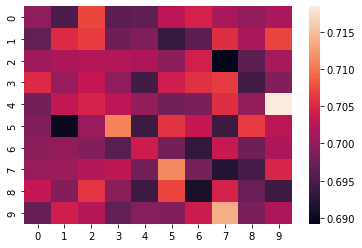

In [5]:
sns.heatmap(beta_matrix)

In [6]:
I_0_matrix = stats.norm(1e-5, 1e-7).rvs(size=xsize * ysize).reshape(xsize, ysize)

In [7]:
S_0_matrix = np.ones(shape=(xsize, ysize)) - I_0_matrix

In [8]:
I_arr, S_arr = [I_0_matrix], [S_0_matrix]

In [9]:
for i in range(max_iterations):
    S_arr.append(S_arr[-1] - beta_matrix * S_arr[-1] * I_arr[-1])
    I_arr.append(I_arr[-1] + beta_matrix * S_arr[-1] * I_arr[-1] - gamma * I_arr[-1])

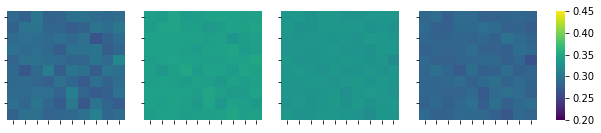

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2), gridspec_kw={"width_ratios": [1,1,1,1,0.08]})


sns.heatmap(I_arr[26], ax=axes[0], cbar=False,  vmin=0.2, vmax=0.45, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[28], ax=axes[1], cbar=False, vmin=0.2, vmax=0.45, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[30], ax=axes[2], cbar=False,  vmin=0.2, vmax=0.45, cmap=sns.color_palette("viridis", as_cmap=True))
sns.heatmap(I_arr[32], ax=axes[3],  cbar_ax=axes[4], vmin=0.2, vmax=0.45, cmap=sns.color_palette("viridis", as_cmap=True))

for a in axes[0:4]:
    a.set(xticklabels=[], yticklabels=[])

plt.savefig("spatial_lattice_days.pdf")

In [14]:
I_arr

[array([[9.93903745e-06, 1.00314946e-05, 9.96857205e-06, 9.96913966e-06,
         1.01542670e-05, 1.01067175e-05, 1.00505142e-05, 1.00071576e-05,
         1.00345926e-05, 1.00611900e-05],
        [9.94272157e-06, 1.00807946e-05, 9.98923996e-06, 1.00500675e-05,
         9.92193082e-06, 1.00316824e-05, 9.99315943e-06, 1.00145950e-05,
         1.01236878e-05, 1.01504837e-05],
        [1.00347983e-05, 1.01064005e-05, 9.92558268e-06, 9.77795482e-06,
         1.01282958e-05, 9.96475667e-06, 1.00092829e-05, 9.96591446e-06,
         9.98387490e-06, 1.00013643e-05],
        [1.00248167e-05, 9.99725497e-06, 9.87779110e-06, 9.95541276e-06,
         9.93192710e-06, 9.99878010e-06, 9.92378476e-06, 9.97711159e-06,
         9.97865745e-06, 9.86182703e-06],
        [9.86039749e-06, 1.01773412e-05, 1.00432301e-05, 9.89710466e-06,
         1.00001793e-05, 1.00136884e-05, 1.00289923e-05, 1.01310643e-05,
         1.00942313e-05, 9.99247992e-06],
        [1.02141544e-05, 1.01871816e-05, 9.88055553e-06, 9.9

In [20]:
I_fractions = np.dstack(I_arr)
S_fractions = np.dstack(S_arr)

<ipython-input-28-2169b00c58e1>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


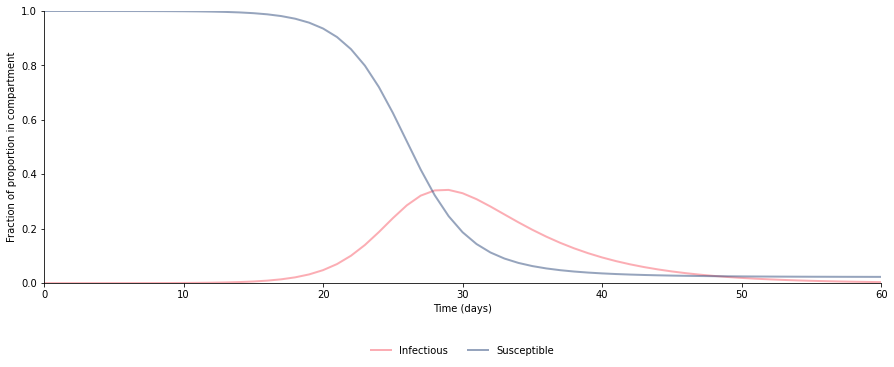

In [28]:
fig = plt.figure(facecolor="w", figsize=(15, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(range(I_fractions.shape[2]), [I_fractions[:, :, i].mean() for i in range(I_fractions.shape[2])], color=COLORS["I"], alpha=0.5, lw=2, label="Infectious")
ax.plot(range(S_fractions.shape[2]), [S_fractions[:, :, i].mean() for i in range(S_fractions.shape[2])], color=COLORS["S"], alpha=0.5, lw=2, label="Susceptible")

ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")
ax.set_ylim(0, 1.0)
ax.set_xlim(0, 60)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

fig.subplots_adjust(bottom=0.25)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=3, frameon=False)

plt.savefig("sir_from_lattice.pdf")
plt.show()

<ipython-input-73-b6ac48551968>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


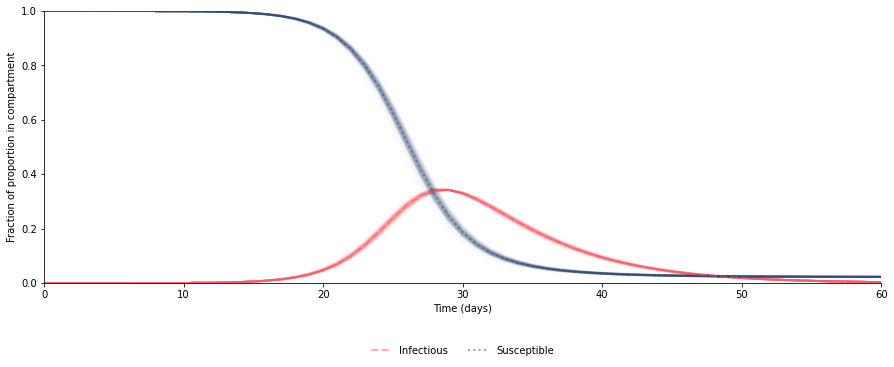

In [73]:
fig = plt.figure(facecolor="w", figsize=(15, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(I_fractions.reshape(100, 101).T, color=COLORS["I"], alpha=0.02, lw=2, label=None)
ax.plot(S_fractions.reshape(100, 101).T, color=COLORS["S"], alpha=0.02, lw=2, label=None)

ax.plot(range(I_fractions.shape[2]), [I_fractions[:, :, i].mean() for i in range(I_fractions.shape[2])], color=COLORS["I"], linestyle="dashed", alpha=0.5, lw=2, label="Infectious")
ax.plot(range(S_fractions.shape[2]), [S_fractions[:, :, i].mean() for i in range(S_fractions.shape[2])], color=COLORS["S"], linestyle="dotted", alpha=0.5, lw=2, label="Susceptible")


ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")
ax.set_ylim(0, 1.0)
ax.set_xlim(0, 60)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend(["Infectious", "Susceptible"])
legend.get_frame().set_alpha(0.5)

fig.subplots_adjust(bottom=0.25)
plt.legend(title='', bbox_to_anchor=(0.5, -0.3), loc="lower center", ncol=3, frameon=False)

plt.savefig("sir_from_lattice.pdf")
plt.show()